In [2]:
import os
import dask.dataframe as dd
import pandas as pd
from pathlib import Path
import ml_functions

2023-10-21 11:44:18.241754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 11:44:18.549312: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
TMPDIR = os.getenv("TMPDIR")

old = pd.read_parquet(Path(TMPDIR) / f"HRRR.1hr.par")
new = pd.read_parquet(Path(TMPDIR) / f"HRRR.4hr.par")

In [4]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45777384 entries, 1 to 1308
Columns: 367 entries, forecast_hour to flashes_40km_1hr
dtypes: datetime64[ns](3), float32(337), int32(27)
memory usage: 63.4 GB


In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45629580 entries, 1 to 1308
Columns: 367 entries, forecast_hour to flashes_40km_4hr
dtypes: datetime64[ns](3), float32(337), int32(27)
memory usage: 63.2 GB


In [6]:
old.head()

,forecast_hour,SBCAPE,MLCAPE,SBCINH,MLCINH,UP_HELI_MAX,UP_HELI_MAX03,UP_HELI_MIN,W_UP_MAX,W_DN_MAX,...,Local_Solar_Hour_cos,time_coverage_start,cg_20km_1hr,ic_20km_1hr,cg.ic_20km_1hr,cg_40km_1hr,ic_40km_1hr,cg.ic_40km_1hr,flashes_20km_1hr,flashes_40km_1hr
pt,,,,,,,,,,,,,,,,,,,,,
1,1,1423.470459,1150.233154,-10.753086,-6.444445,0.3,0.5,-0.2,4.8750,-1.825709,...,0.117370,2019-10-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1875.116577,1029.039795,-8.737997,-10.473251,0.0,0.0,0.0,0.3125,-0.200709,...,0.131476,2019-10-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,513.580261,431.234558,-29.891632,-36.389576,0.0,0.0,0.0,1.3750,-0.638209,...,0.403623,2019-10-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1490.535034,1197.846313,-3.755830,-2.356653,8.7,3.8,-5.6,23.0000,-5.013209,...,0.416453,2019-10-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1283.868286,1079.506226,-23.551441,-12.923182,0.0,0.0,0.0,0.4375,-0.325709,...,0.102817,2019-10-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
new.tail().iloc[:,-8:] >= 10

,cg_20km_4hr,ic_20km_4hr,cg.ic_20km_4hr,cg_40km_4hr,ic_40km_4hr,cg.ic_40km_4hr,flashes_20km_4hr,flashes_40km_4hr
pt,,,,,,,,
1304,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False
1308,False,False,False,False,False,False,False,False


In [11]:
new = ml_functions.rptdist2bool(new, args)

TypeError: rptdist2bool() missing 1 required positional argument: 'args'

In [23]:
old.loc[(slice(None,"20201104T04"), slice(None), slice(None), slice(None))]

SBCAPE        MLCAPE  \
valid_time          y  x  forecast_hour                               
2019-10-02 01:00:00 12 48 1              1.423470e+03  1.150233e+03   
                       49 1              1.875117e+03  1.029040e+03   
                       69 1              5.135803e+02  4.312346e+02   
                       70 1              1.490535e+03  1.197846e+03   
                    13 47 1              1.283868e+03  1.079506e+03   
...                                               ...           ...   
2020-11-04 04:00:00 46 27 28             1.700960e+00  1.138546e+00   
                       28 4             -7.167107e-15  1.477419e-14   
                          28             6.846375e-15 -1.144352e-14   
                       29 4              5.678585e-15  4.463508e-14   
                          28            -1.101588e-14 -7.195890e-16   

                                               SBCINH        MLCINH  \
valid_time          y  x  forecast_hour                               
2019-10-02 01:00:00 12 48 1             -1.075309e+01 -6.444445e+00   
                       49 1             -8.737997e+00 -1.047325e+01   
                       69 1             -2.989163e+01 -3.638958e+01   
                       70 1             -3.755830e+00 -2.356653e+00   
                    13 47 1             -2.355144e+01 -1.292318e+01   
...                                               ...           ...   
2020-11-04 04:00:00 46 27 28            -9.108368e-01 -9.657065e-01   
                       28 4             -5.486968e-03 -1.371742e-03   
                          28            -2.743484e-03 -6.172840e-02   
                       29 4             -1.371742e-03  5.639522e-15   
                          28             3.791206e-15 -6.858710e-02   

                                         UP_HELI_MAX  UP_HELI_MAX03  \
valid_time          y  x  forecast_hour                               
2019-10-02 01:00:00 12 48 1                      0.3            0.5   
                       49 1                      0.0            0.0   
                       69 1                      0.0            0.0   
                       70 1                      8.7            3.8   
                    13 47 1                      0.0            0.0   
...                                              ...            ...   
2020-11-04 04:00:00 46 27 28                     0.6            0.8   
                       28 4                      0.1            0.3   
                          28                     0.3            0.4   
                       29 4                      0.3            0.1   
                          28                     0.4            0.2   

                                         UP_HELI_MIN  W_UP_MAX  W_DN_MAX  \
valid_time          y  x  forecast_hour                                    
2019-10-02 01:00:00 12 48 1                     -0.2    4.8750 -1.825709   
                       49 1                      0.0    0.3125 -0.200709   
                       69 1                      0.0    1.3750 -0.638209   
                       70 1                     -5.6   23.0000 -5.013209   
                    13 47 1                      0.0    0.4375 -0.325709   
...                                              ...       ...       ...   
2020-11-04 04:00:00 46 27 28                    -0.4    3.7500 -2.682981   
                       28 4                     -0.6    3.4375 -4.064258   
                          28                    -0.4    2.5625 -3.557981   
                       29 4                     -0.5    1.6875 -2.501758   
                          28                    -0.4    1.7500 -2.182981   

                                              SRH01  ...  torwarn_rptdist_0hr  \
valid_time          y  x  forecast_hour              ...                        
2019-10-02 01:00:00 12 48 1               27.520164  ...                   -1   
                       49 1               2

In [33]:
old.columns[-40:]

Index(['HGT0C-N7T1', 'HGT0C-N7T3', 'HGT0C-N7T5', 'UP_HELI_MAX-N1T5',
       'UP_HELI_MAX80-N1T5', 'UP_HELI_MAX120-N1T5', 'lat', 'lon',
       'initialization_time', 'hailone_rptdist_0hr', 'hailone_rptdist_1hr',
       'hailone_rptdist_2hr', 'wind_rptdist_0hr', 'wind_rptdist_1hr',
       'wind_rptdist_2hr', 'torn_rptdist_0hr', 'torn_rptdist_1hr',
       'torn_rptdist_2hr', 'sighail_rptdist_0hr', 'sighail_rptdist_1hr',
       'sighail_rptdist_2hr', 'sigwind_rptdist_0hr', 'sigwind_rptdist_1hr',
       'sigwind_rptdist_2hr', 'windmg_rptdist_0hr', 'windmg_rptdist_1hr',
       'windmg_rptdist_2hr', 'svrwarn_rptdist_0hr', 'svrwarn_rptdist_1hr',
       'svrwarn_rptdist_2hr', 'torwarn_rptdist_0hr', 'torwarn_rptdist_1hr',
       'torwarn_rptdist_2hr', 'dayofyear_sin', 'dayofyear_cos',
       'Local_Solar_Hour_sin', 'Local_Solar_Hour_cos', 'cg_40km_4hr',
       'ic_40km_4hr', 'flashes_40km_4hr'],
      dtype='object')

In [24]:
new[(new.valid_time <= pd.to_datetime("20201104T04"))].set_index(["valid_time","y","x","forecast_hour"])

SBCAPE        MLCAPE  \
valid_time          y  x  forecast_hour                               
2019-10-02 04:00:00 12 48 4              1.344828e+03  6.681070e+02   
                       49 4              2.180137e+03  1.368958e+03   
                       69 4              9.420714e+02  8.864472e+02   
                       70 4              1.473649e+03  1.122826e+03   
                    13 47 4              1.026749e+03  8.348560e+02   
...                                               ...           ...   
2020-11-04 04:00:00 46 27 4              1.646091e-01  6.858710e-02   
                       28 28             6.846375e-15 -1.144352e-14   
                          4             -7.167107e-15  1.477419e-14   
                       29 28            -1.101588e-14 -7.195890e-16   
                          4              5.678585e-15  4.463508e-14   

                                               SBCINH        MLCINH  \
valid_time          y  x  forecast_hour                               
2019-10-02 04:00:00 12 48 4             -1.463375e+01 -1.651303e+01   
                       49 4             -8.130316e+00 -6.356653e+00   
                       69 4             -2.085871e+01 -5.633745e+00   
                       70 4             -6.548697e+00 -7.299040e+00   
                    13 47 4             -1.754733e+01 -1.227435e+01   
...                                               ...           ...   
2020-11-04 04:00:00 46 27 4             -9.739369e-02 -1.042524e-01   
                       28 28            -2.743484e-03 -6.172840e-02   
                          4             -5.486968e-03 -1.371742e-03   
                       29 28             3.791206e-15 -6.858710e-02   
                          4             -1.371742e-03  5.639522e-15   

                                         UP_HELI_MAX  UP_HELI_MAX03  \
valid_time          y  x  forecast_hour                               
2019-10-02 04:00:00 12 48 4                      0.0            0.0   
                       49 4                      0.0            0.0   
                       69 4                      1.1            1.5   
                       70 4                      5.1            7.7   
                    13 47 4                      0.0            0.0   
...                                              ...            ...   
2020-11-04 04:00:00 46 27 4                      0.4            0.3   
                       28 28                     0.3            0.4   
                          4                      0.1            0.3   
                       29 28                     0.4            0.2   
                          4                      0.3            0.1   

                                         UP_HELI_MIN  W_UP_MAX  W_DN_MAX  \
valid_time          y  x  forecast_hour                                    
2019-10-02 04:00:00 12 48 4                      0.0    0.1875 -0.183955   
                       49 4                      0.0    0.1875 -0.246455   
                       69 4                     -0.3    2.4375 -1.121455   
                       70 4                     -7.5   15.0625 -4.121455   
                    13 47 4                      0.0    0.7500 -0.371455   
...                                              ...       ...       ...   
2020-11-04 04:00:00 46 27 4                     -0.3    3.6250 -3.376758   
                       28 28                    -0.4    2.5625 -3.557981   
                          4                     -0.6    3.4375 -4.064258   
                       29 28                    -0.4    1.7500 -2.182981   
                          4                     -0.5    1.6875 -2.501758   

                                              SRH01  ...  dayofyear_sin  \
valid_time          y  x  forecast_hour              ...                  
2019-10-02 04:00:00 12 48 4                2.218107  ...      -0.999833   
                       49 4                9.362414  ...     

In [25]:
df = (
    new[
        (new.valid_time <= pd.to_datetime("20201104T04"))
    ].set_index(["valid_time","y","x","forecast_hour"])
    - old.loc[(slice(None,"2020-11-04 04:00:00"), slice(None), slice(None), slice(None))]
)
df = df.drop(columns={f"cg_20km_{twin}hr", f"flashes_20km_{twin}hr", f"ic_20km_{twin}hr"}).dropna()
x = df.loc[:, (df != 0).any(axis=0)].drop(columns="initialization_time")
x

cg_40km_4hr  ic_40km_4hr
valid_time          y  x  forecast_hour                          
2019-10-02 04:00:00 12 48 4                      0.0          0.0
                       49 4                      0.0          0.0
                       69 4                      0.0          0.0
                       70 4                      0.0          0.0
                    13 47 4                      0.0          0.0
...                                              ...          ...
2020-11-04 04:00:00 46 27 28                     0.0          0.0
                       28 4                      0.0          0.0
                          28                     0.0          0.0
                       29 4                      0.0          0.0
                          28                     0.0          0.0

[4457664 rows x 2 columns]

In [26]:
x.loc[(x != 0).any(axis=1)]

cg_40km_4hr  ic_40km_4hr
valid_time          y  x  forecast_hour                          
2020-02-07 20:00:00 33 67 44                0.000000    -1.000000
                    34 66 44               -1.000000     0.000000
                    40 76 44                0.600000     0.000000
2020-02-08 12:00:00 34 66 12               -1.000000     0.000000
                    40 30 12                0.000000    -1.000000
...                                              ...          ...
2020-09-09 16:00:00 22 49 40                0.000000     1.000000
                    27 72 16                0.000000     0.333333
                          40                0.000000     0.333333
                    31 55 16                0.333333    -2.000000
                          40                0.333333    -2.000000

[527 rows x 2 columns]

In [28]:
x.loc[(x != 0).any(axis=1)].idxmin()

cg_40km_4hr    (2020-08-25 16:00:00, 32, 66, 16)
ic_40km_4hr    (2020-08-25 16:00:00, 32, 67, 16)
dtype: object

In [30]:
old.loc[("2020-08-25 16:00:00", 32, 66, 16),["lon","lat",f"ic_40km_{twin}hr"]]

lon            -82.072418
lat             40.222260
ic_40km_4hr    378.000000
Name: (2020-08-25 16:00:00, 32, 66, 16), dtype: float32

In [32]:
new.loc[(new.valid_time=="2020-08-25 16:00:00") & (new.y==32) & (new.x==66),["forecast_hour","lon","lat",f"ic_40km_{twin}hr"]]

,forecast_hour,lon,lat,ic_40km_4hr
pt,,,,
708,40,-82.072418,40.22226,5.714286
708,16,-82.072418,40.22226,5.714286


In [11]:
old = old.set_index("initialization_time", append=True)
old.index = old.index.reorder_levels(order=["initialization_time", "valid_time", "y", "x"])

In [12]:
new = new.set_index(["initialization_time", "valid_time", "y", "x"])

In [ ]:
d=(new-old).dropna(subset="CAPESHEAR")

In [ ]:
d.head()

In [3]:
parser = ml_functions.get_argparser()
args, argv = parser.parse_known_args()
args.batchnorm = True
args.model = 'HRRR'
args.epochs = 10
args.debug = False
args.kfold = 1
args.learning_rate = 0.01
args.neurons = [32,32]
args.optimizer = 'SGD'
args.suite = "with_storm_mode"
args.teststart = pd.to_datetime("19000101")
args.testend = pd.to_datetime("20220101")
args.labels = ['sighail_40km_2hr', 'sigwind_40km_2hr', 'hailone_40km_2hr', 'wind_40km_2hr', 'torn_40km_2hr', 'any_40km_2hr']

In [4]:
new = ml_functions.rptdist2bool(new, args)


<AxesSubplot: xlabel='initialization_time'>

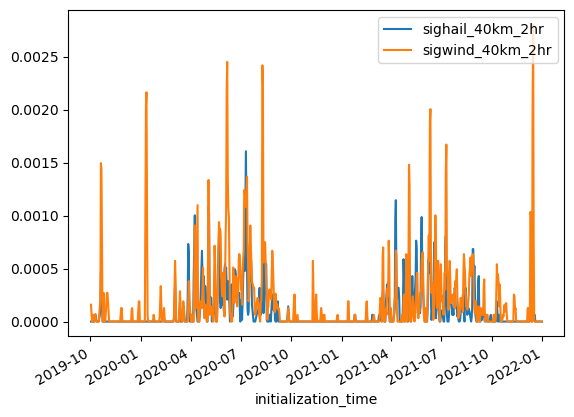

In [5]:
new[["sighail_40km_2hr","sigwind_40km_2hr"]].groupby("initialization_time").mean().plot()

<AxesSubplot: xlabel='initialization_time'>

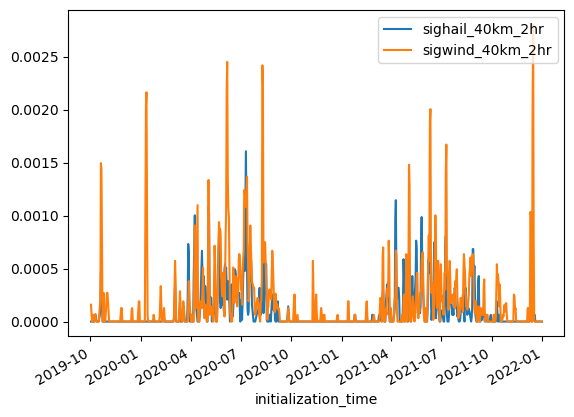

In [6]:
new[["sighail_40km_2hr","sigwind_40km_2hr"]].groupby("initialization_time").mean().plot()

In [7]:
rptdist = 40
lsrtypes = ["sighail", "sigwind", "hailone", "wind", "torn"]
oldtwin = [0,1,2]
label_cols = [f"{r}_rptdist_{t}hr" for r in lsrtypes for t in oldtwin]
# refer to new label names (with f"{rptdist}km" not f"rptdist")
new_label_cols = {r:r.replace("rptdist", f"{rptdist}km") for r in label_cols}
label_cols = list(new_label_cols.values())
new_label_cols

{'sighail_rptdist_0hr': 'sighail_40km_0hr',
 'sighail_rptdist_1hr': 'sighail_40km_1hr',
 'sighail_rptdist_2hr': 'sighail_40km_2hr',
 'sigwind_rptdist_0hr': 'sigwind_40km_0hr',
 'sigwind_rptdist_1hr': 'sigwind_40km_1hr',
 'sigwind_rptdist_2hr': 'sigwind_40km_2hr',
 'hailone_rptdist_0hr': 'hailone_40km_0hr',
 'hailone_rptdist_1hr': 'hailone_40km_1hr',
 'hailone_rptdist_2hr': 'hailone_40km_2hr',
 'wind_rptdist_0hr': 'wind_40km_0hr',
 'wind_rptdist_1hr': 'wind_40km_1hr',
 'wind_rptdist_2hr': 'wind_40km_2hr',
 'torn_rptdist_0hr': 'torn_40km_0hr',
 'torn_rptdist_1hr': 'torn_40km_1hr',
 'torn_rptdist_2hr': 'torn_40km_2hr'}

In [8]:
old = old.rename(columns=new_label_cols, copy=False)
old[label_cols] = (0 <= old[label_cols]) & (old[label_cols] < rptdist)

NameError: name 'old' is not defined

In [ ]:
new = new.rename(columns=new_label_cols, copy=False)
new[label_cols] = (0 <= new[label_cols]) & (new[label_cols] < rptdist)

In [ ]:
xx = old.sigwind_40km_2hr.groupby(["y","x"]).mean()
xx.reset_index().plot(x="x",y="y", kind="scatter", c=xx)

In [ ]:
yy = new.sigwind_40km_2hr.groupby(["y","x"]).mean() - old.sigwind_40km_2hr.groupby(["y","x"]).mean()
yy.reset_index().plot(x="x",y="y", kind="scatter", c = yy, colormap="cool")

In [ ]:
sl = new.xs(slice("20210101","20211231T12"), level="initialization_time")

In [ ]:
sl.mean().tail(40)

In [ ]:
cr.tail(40)

In [ ]:
set(new.columns) - set(old.columns)

In [ ]:
set(old.columns) - set(new.columns)

In [ ]:
old.torn_40km_0hr.max()

In [ ]:
old.index.get_level_values("initialization_time").min(),old.index.get_level_values("initialization_time").max()

In [ ]:
new.index.get_level_values("initialization_time").min(),new.index.get_level_values("initialization_time").max()

In [ ]:
pd.to_datetime(new.index.get_level_values("initialization_time"))

In [ ]:
old.index.equals(new.index)

In [ ]:
all(new.index.get_level_values("initialization_time") == old.index.get_level_values("initialization_time"))

In [ ]:
np.array_equal(old.iloc[:,40:244].values , new.iloc[:,40:244].values, equal_nan=True )

In [ ]:
new.columns[224:]

In [ ]:
import numpy as np